In [1]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local

--2020-12-13 19:01:08--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh [following]
--2020-12-13 19:01:08--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88867207 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.3-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  84.75M   154MB/s    in 0.6s    

2020-12-13 19:01:09 (154 MB/s) - ‘Minicon

In [2]:
!conda install -q -y -c conda-forge rdkit==2018.09.3
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit==2018.09.3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.68.0               |py37h8619c78_1001         310 KB  conda-forge
    boost-cpp-1.68.0           |    h11c811c_1000        20.5 MB  conda-forge
    bzip2-1.0.8                |       h516909a_3         398 KB  conda-forge
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    cairo-1.16.0               |    h18b612c_1001         1.5 MB  conda-forge
    certifi-2020.12.5          |   py37h89c1867_0         143 KB  conda-forge
    conda-4.9.2                |   py37h89c1867_0         3.0 MB  conda-forge
    fontconfig-2.13.1          |    he4413a7_1000         327 KB

In [3]:
!pip install dgllife

     |████████████████████████████████| 130 kB 3.6 MB/s 
     |████████████████████████████████| 6.8 MB 18.1 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 kB/s 
     |████████████████████████████████| 1.6 MB 46.8 MB/s 
     |████████████████████████████████| 965 kB 47.0 MB/s 
     |████████████████████████████████| 301 kB 39.6 MB/s 
     |████████████████████████████████| 829 kB 42.9 MB/s 
  Created wheel for dgllife: filename=dgllife-0.2.6-py3-none-any.whl size=205835 sha256=e101377f2a3c148f093ac29603a27e7339b19f0bf71dddfd1d28bbb9c254329b
  Stored in directory: /root/.cache/pip/wheels/e8/f6/04/2f27db24cf347eb881b4a0248aa68e7896388f1e8f686bcf87
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=d61a5f5ffe44ed0e65352a53dd5784951a75b97ba9b65f2bc11aa952a0b32a6a
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built dgllife future


In [4]:
!pip install dgl

     |████████████████████████████████| 3.6 MB 5.3 MB/s 


In [5]:
!pip install torch

     |████████████████████████████████| 776.8 MB 16 kB/s 


In [18]:
!python eval.py -d ZINC -o random -pr -np 10

Using backend: pytorch
Prepare logging directory...
Created directory ./eval_results/ZINC_random_2020-12-13_19-44-58
Saved settings to ./eval_results/ZINC_random_2020-12-13_19-44-58/settings.txt
Timeout, killing all processes.
It took 0:10:01.155125 for generation.
Merging generated SMILES into a single file...
Removing temporary dirs...
Summarizing training molecules...
Summarizing generated molecules...
Preparing generation statistics...


In [11]:
import matplotlib
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import Draw
from scipy.stats import norm

In [12]:
def vis_mols(path_to_smiles, num_mols_to_plot):
    with open(path_to_smiles, 'r') as f:
        smiles = f.read().splitlines()
    mols = [Chem.MolFromSmiles(s) for s in smiles[:num_mols_to_plot]]
    img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(180, 150), useSVG=True)
    return img


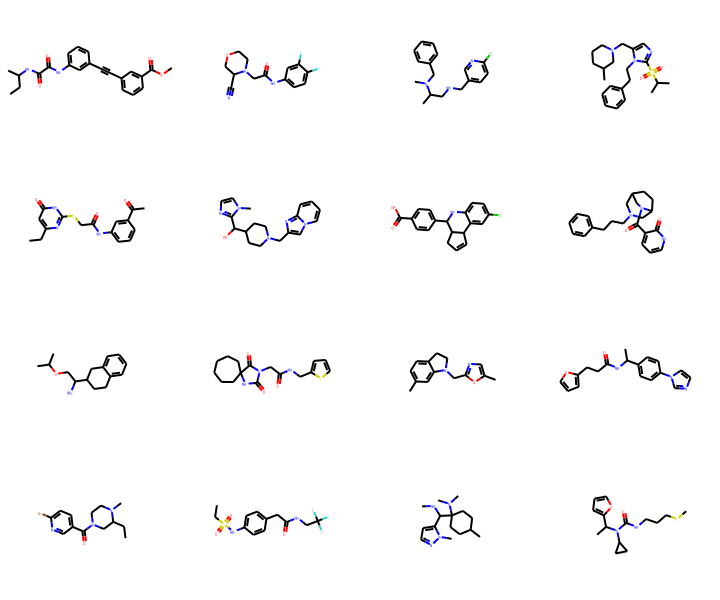

In [14]:
path_to_training_smiles = 'ZINC_DGMG_train.txt'
num_mols_to_plot = 16
SVG(vis_mols(path_to_training_smiles, num_mols_to_plot))

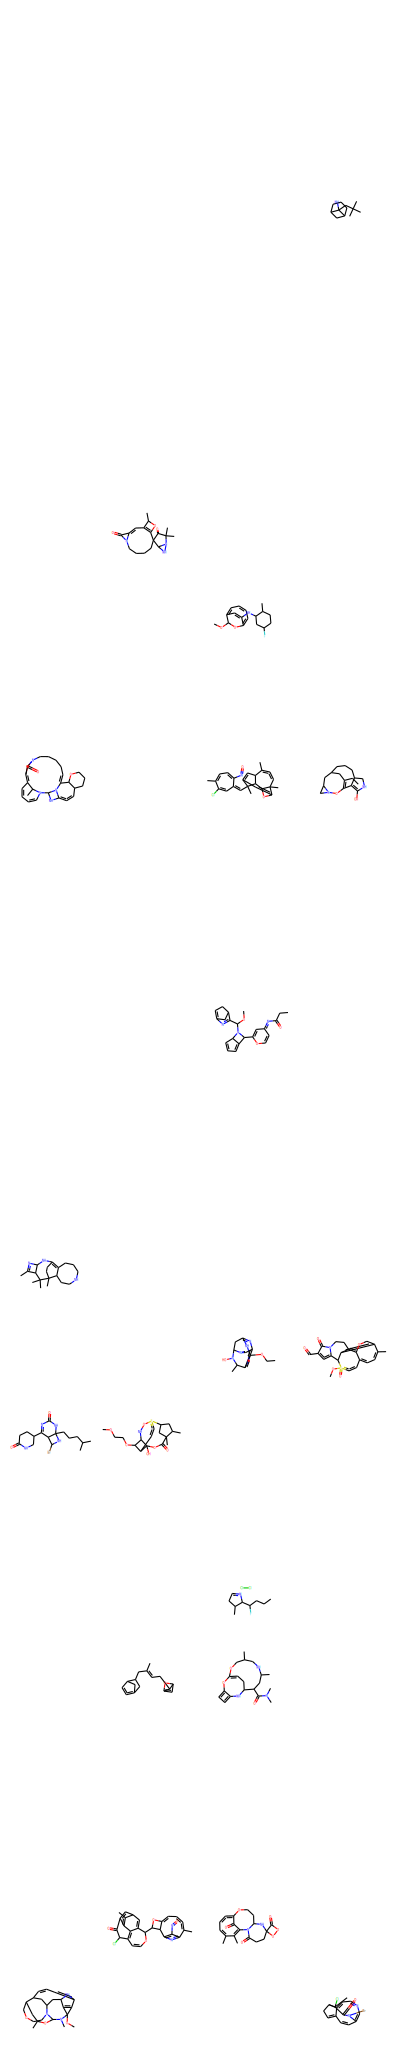

In [29]:
path_to_generated_smiles = 'eval_results/ZINC_random_2020-12-13_19-44-58/generated_smiles.txt'
num_mols_to_plot = 100
SVG(vis_mols(path_to_generated_smiles, num_mols_to_plot))

In [27]:
path_to_dataset_summary = 'eval_results/ZINC_random_2020-12-13_19-44-58/train_summary.pickle'
path_to_generation_summary = 'eval_results/ZINC_random_2020-12-13_19-44-58/generation_summary.pickle'
with open(path_to_dataset_summary, 'rb') as f:
    dataset_summary = pickle.load(f)
with open(path_to_generation_summary, 'rb') as f:
    generation_summary = pickle.load(f)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

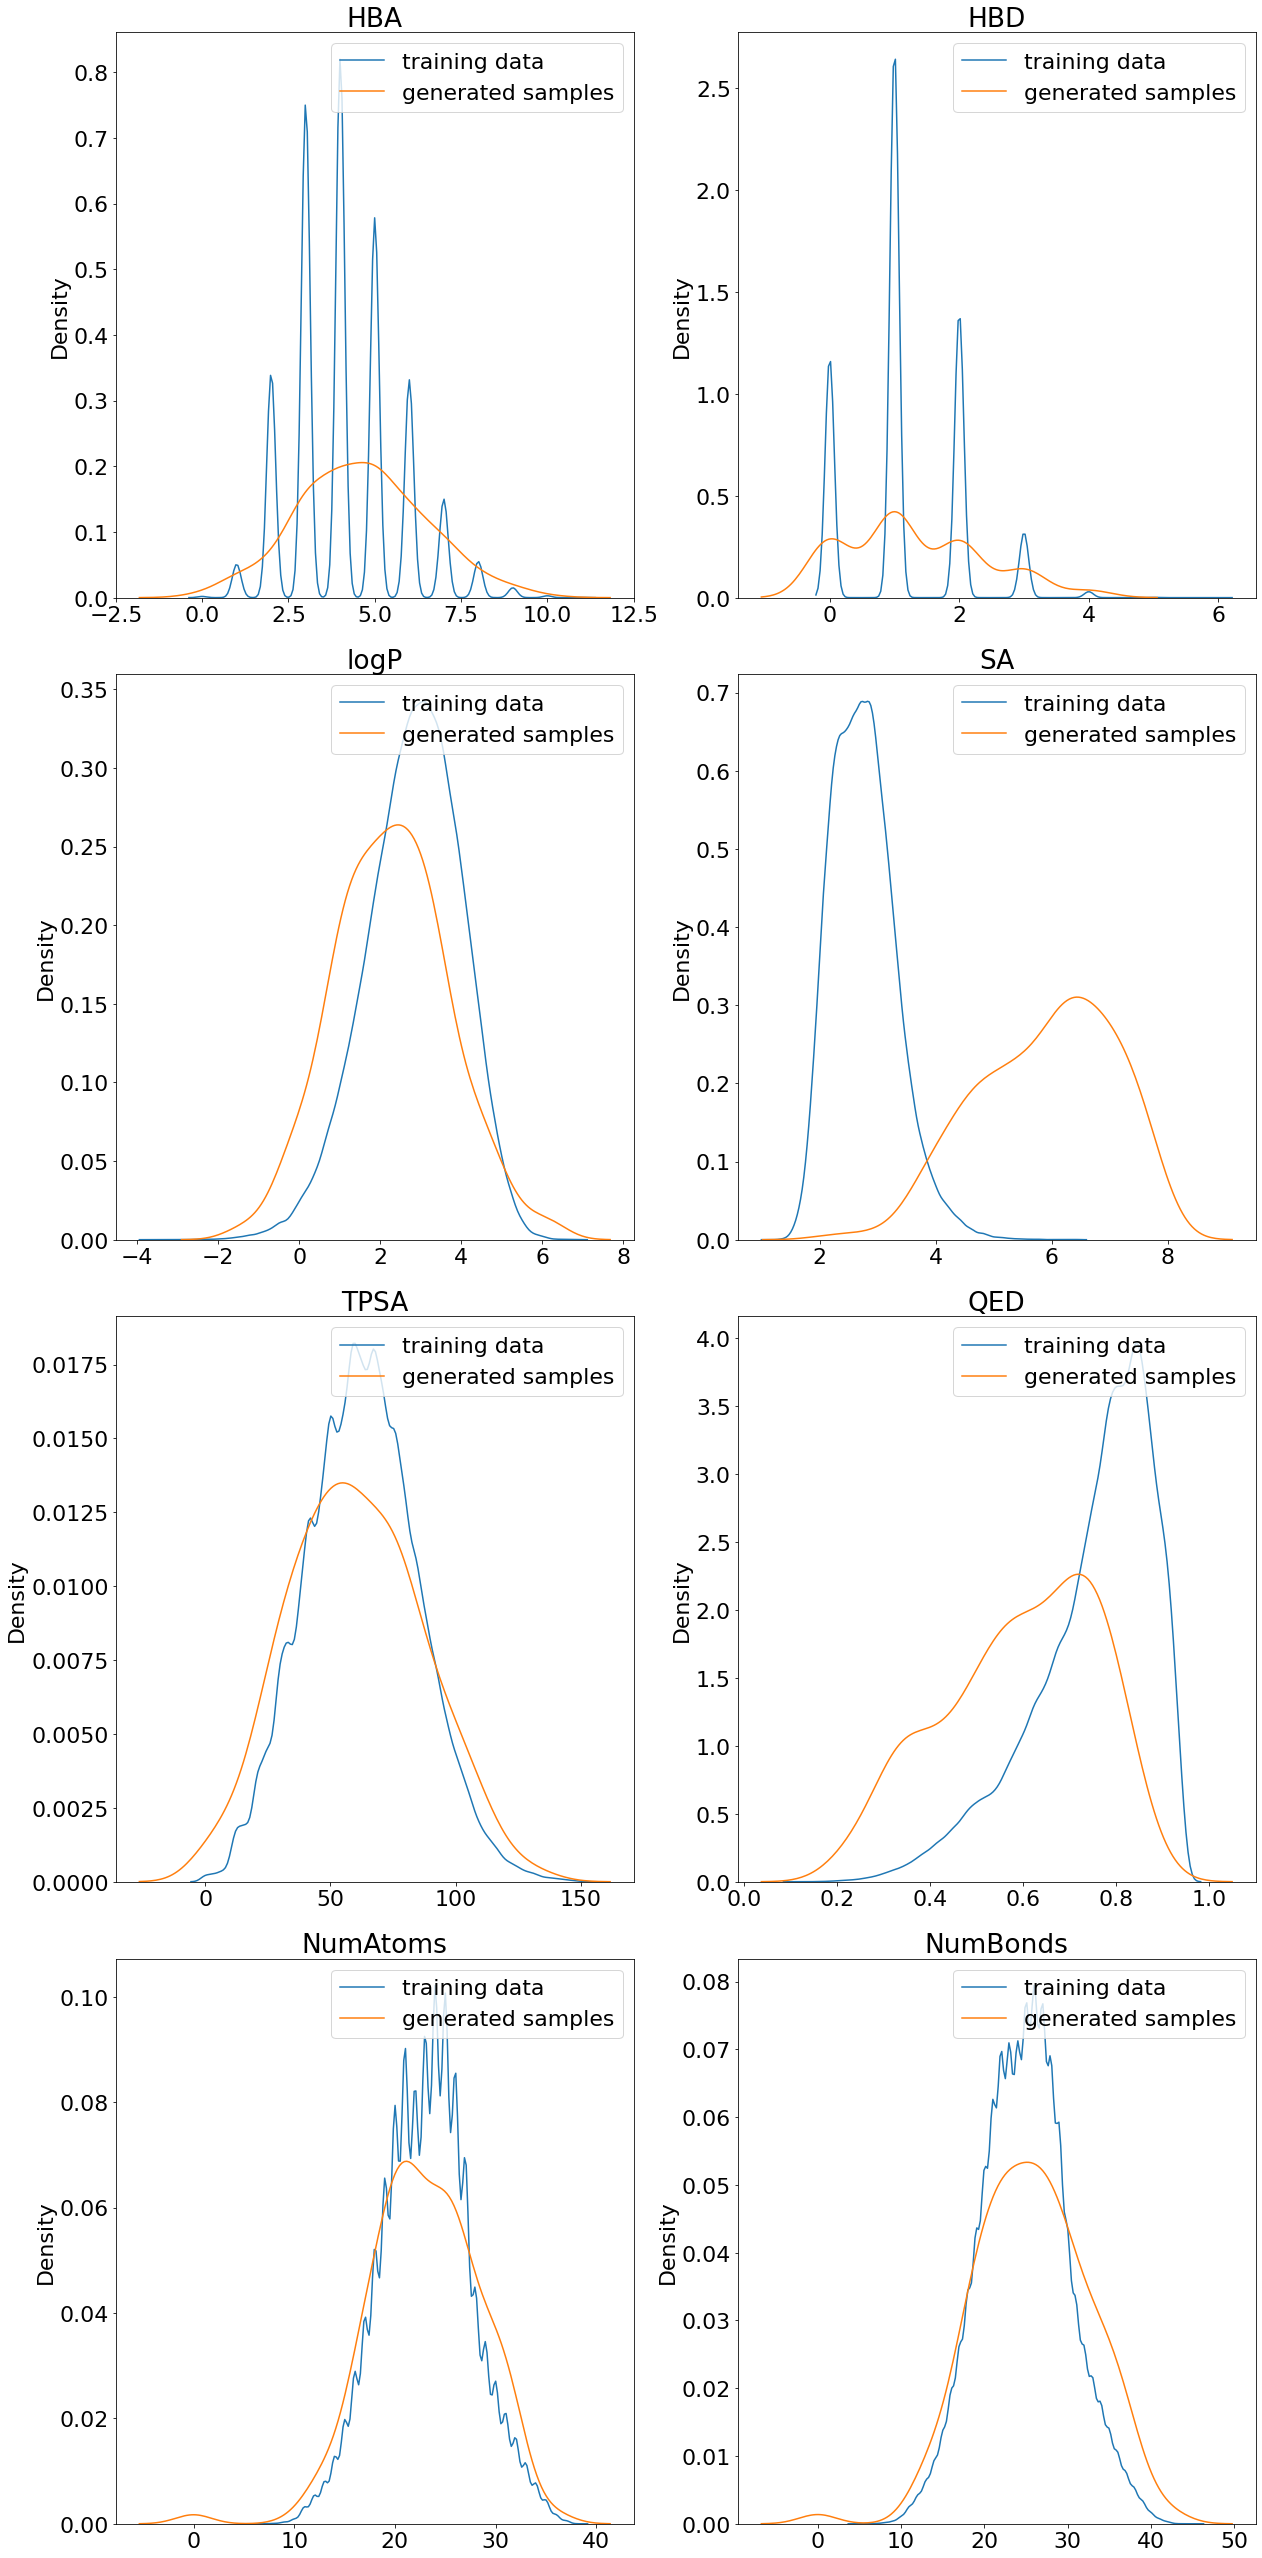

In [28]:
font = {'size': 22}

matplotlib.rc('font', **font)

items = ['HBA', 'HBD', 'logP', 'SA', 'TPSA', 'QED', 
         'NumAtoms', 'NumBonds']
fig, axes = plt.subplots(4, 2, figsize=(18, 36))
    
for i, metric in enumerate(items):
    row = i // 2
    col = i % 2
    ax = axes[row][col]
    sns.distplot(dataset_summary[metric], hist=False, 
                 ax=ax, label='training data')
    sns.distplot(generation_summary[metric], hist=False, 
                 ax=ax, label='generated samples')
    ax.set_title(metric)
    ax.legend(loc='upper right')
plt.tight_layout()